In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
df = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(df.head())


   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree  age  outcome  
0              0.627   50        1  
1              0.351   31        0  
2              0.672   32        1  
3              0.167   21        0  
4              2.288   33        1  


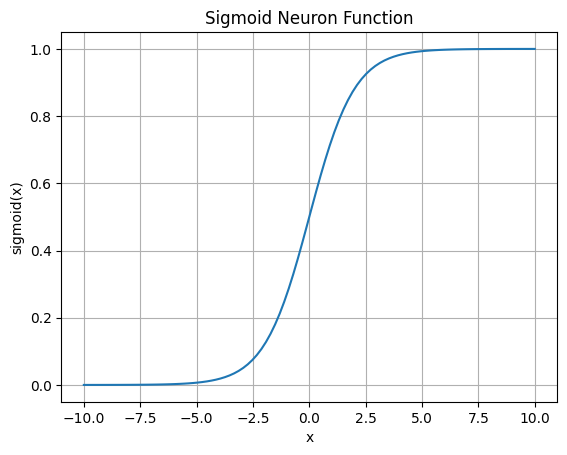

In [20]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate some random values for the x-axis
x = np.linspace(-10, 10, 100)

# Compute the sigmoid values for the x-axis values
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Neuron Function')
plt.grid(True)
plt.show()


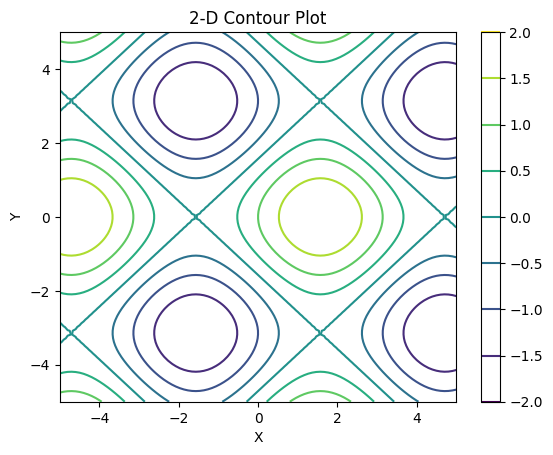

In [16]:
# Generate dummy data for X and Y
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

# Compute Z values using a dummy function (you can replace it with your own)
Z = np.sin(X) + np.cos(Y)

# Plot the contour plot
plt.contour(X, Y, Z, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2-D Contour Plot')
plt.colorbar()
plt.show()


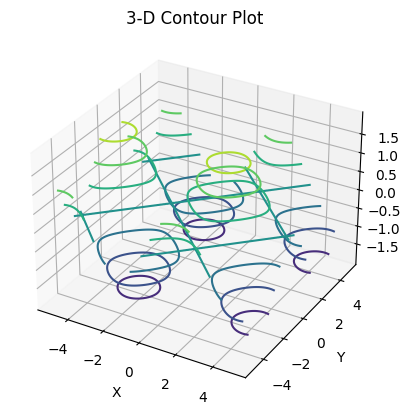

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the 3D contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3-D Contour Plot')
plt.show()


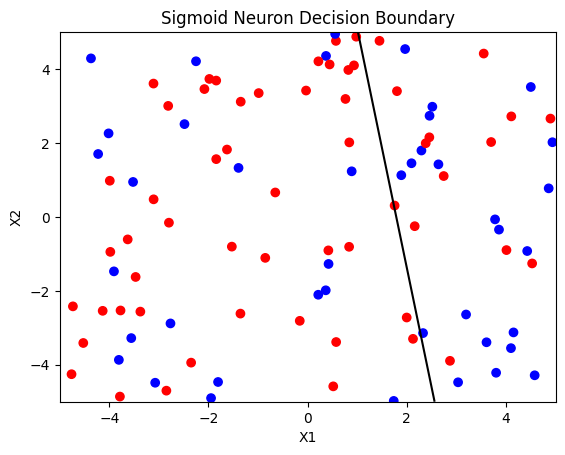

In [18]:
# Generate dummy data for X and Y
X = np.random.uniform(-5, 5, size=(100, 2))
Y = np.random.randint(0, 2, size=(100,))

# Define the SigmoidNeuron class
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

# Create an instance of SigmoidNeuron
sn = SigmoidNeuron()

# Train the model on the dummy dataset
sn.fit(X, Y, epochs=100, learning_rate=0.1)

# Generate dummy data for plotting the decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
X_dummy = np.c_[X1.ravel(), X2.ravel()]
Y_dummy = sn.sigmoid(sn.perceptron(X_dummy)).reshape(X1.shape)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')
plt.contour(X1, X2, Y_dummy, levels=[0.5], colors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sigmoid Neuron Decision Boundary')
plt.show()
